In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

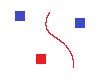

In [2]:
image_direction = 'C:\\Downloads\\2.png'
img = Image.open(image_direction).convert('RGB')
data = np.array(img)
data_shape = np.shape(data)
#----------

img

In [3]:
# this cell will contruct the electric potential field 'V_field' summing over all the pixels from 'data'ArithmeticError
# the electric field will be calculate later using -np.gradient(V_field)

V_field = np.zeros((data_shape[0], data_shape[1]))

for i in range(data_shape[0]):
    for j in range(data_shape[1]):
        Qij = [data[i,j][0], data[i,j][1], data[i,j][2]]
        if Qij[1] != 255: # i.e., if there is no green color, it must be white in our convention
            if Qij[0] >= Qij[2]: # red will be positive charge
                Q = 1
            else:
                Q = -1
            for ii in range(data_shape[0]):
                for jj in range(data_shape[1]):
                    if (ii,jj) != (i,j):
                        V_field[ii,jj] += Q/np.sqrt((ii-i)**2 + (jj-j)**2)

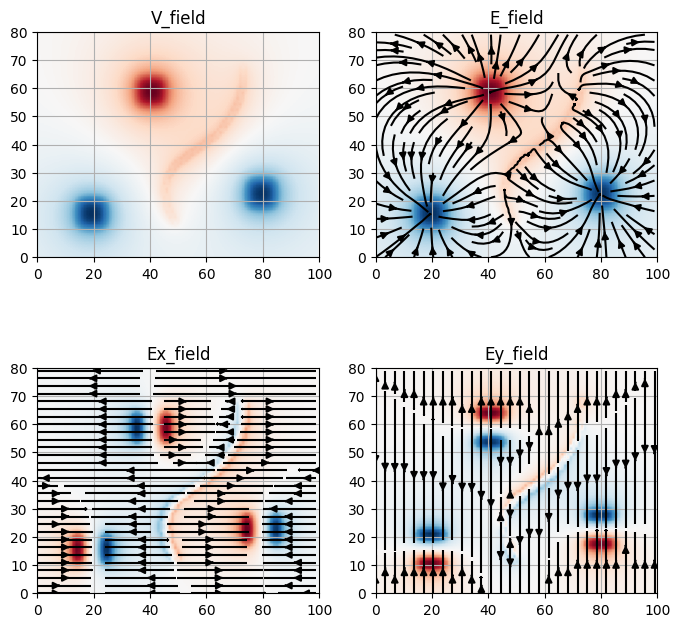

In [4]:
X = np.arange(data_shape[1])
Y = np.arange(data_shape[0])
Ex_field = -np.gradient(V_field)[1]
Ey_field = -np.gradient(V_field)[0]

fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title('V_field')
ax[0,0].imshow(V_field, origin='lower', cmap=plt.cm.RdBu_r)
ax[0,0].set_xlim(0, data_shape[1])
ax[0,0].set_ylim(0, data_shape[0])
ax[0,0].grid(True)

ax[0,1].set_title('E_field')
ax[0,1].imshow(V_field, origin='lower', cmap=plt.cm.RdBu_r)
ax[0,1].streamplot(X, Y, Ex_field, Ey_field, color='black')
ax[0,1].set_xlim(0, data_shape[1])
ax[0,1].set_ylim(0, data_shape[0])
ax[0,1].grid(True)

ax[1,0].set_title('Ex_field')
ax[1,0].imshow(Ex_field, origin='lower', cmap=plt.cm.RdBu_r)
ax[1,0].streamplot(X, Y, Ex_field, 0*Ey_field, color='black')
ax[1,0].set_xlim(0, data_shape[1])
ax[1,0].set_ylim(0, data_shape[0])
ax[1,0].grid(True)

ax[1,1].set_title('Ey_field')
ax[1,1].imshow(Ey_field, origin='lower', cmap=plt.cm.RdBu_r)
ax[1,1].streamplot(X, Y, 0*Ex_field, Ey_field, color='black')
ax[1,1].set_xlim(0, data_shape[1])
ax[1,1].set_ylim(0, data_shape[0])
ax[1,1].grid(True)